# Importing the Required Libraries

In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import time
import seaborn as sns

## Reading the dataset

In [2]:
data = pd.read_csv('ecommerce.csv',encoding="ISO-8859-1")
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['TotalQuantity'] = data['Quantity']*data['UnitPrice']
data['Date'] = data['InvoiceDate'].apply(lambda x: x.date())

# RFM (Recency, Frequency, Monetary)


##### RECENCY (R): Days since last purchase

In [3]:
#recency dataframe
recency_df = data.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']

#Today's data
now = dt.date(2021,12,1)

#Recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df.drop('LastPurchaseDate',axis = 1,inplace=True)
recency_df.head(5)

,CustomerID,Recency
0,12346.0,3970
1,12347.0,3647
2,12348.0,3720
3,12349.0,3663
4,12350.0,3955


##### FREQUENCY (F): Total number of purchases
    
#### Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [4]:
temp = data.copy()
temp.drop_duplicates(['InvoiceNo','CustomerID'],keep='first',inplace=True)
frequency_df = temp.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


##### MONETARY VALUE (M): Total money this customer spent. We will create those 3 customer attributes for each customer.

#### Monetary attribute answers the question: How much money did the customer spent over time?
#### To do that, first, we will create a new column total cost to have the total price per invoice.

In [5]:
monetary_df = data.groupby(by = 'CustomerID',as_index=False).agg({'TotalQuantity':'sum'})
monetary_df.columns = ['CustomerID','TotalQuanity']
monetary_df.head(5)

,CustomerID,TotalQuanity
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### Creating a RFM table and writing to Excel

In [6]:
rfm_df = recency_df.merge(frequency_df,on='CustomerID').merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head(5)

,Recency,Frequency,TotalQuanity
CustomerID,,,
12346.0,3970,2,0.00
12347.0,3647,7,4310.00
12348.0,3720,4,1797.24
12349.0,3663,1,1757.55
12350.0,3955,1,334.40


In [7]:
rfm_df.to_excel('E-Commerece_RFM.xlsx')

## RFM Table Visualisation

##### Now we will look at the correlation between the the Recency, Frequency and Monetary part of the RFM table which will be an integral part of customer segmentation

               Recency  Frequency  TotalQuanity
Recency       1.000000  -0.259540     -0.132109
Frequency    -0.259540   1.000000      0.566122
TotalQuanity -0.132109   0.566122      1.000000


<AxesSubplot:>

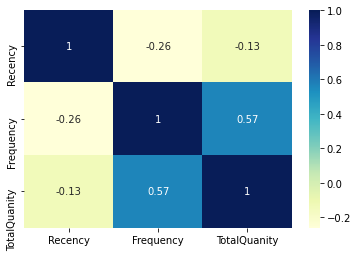

In [8]:
print(rfm_df.corr())
sns.heatmap(rfm_df.corr(),cmap="YlGnBu",annot=True)

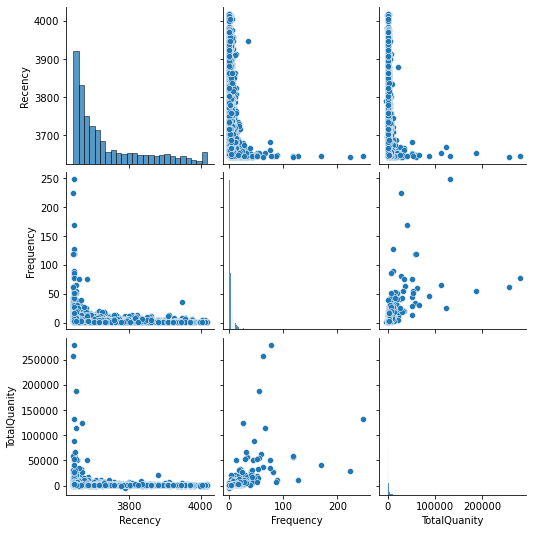

In [9]:
sns.pairplot(rfm_df, diag_kind="hist")